<a href="https://colab.research.google.com/github/pomellonn/Risk_analytics/blob/main/t_intensiv_hw1_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Домашнее задание № 1 (Макс. 10 баллов)

В данной домашней работе мы познакомимся на практике с пройденными в рамках 2 и 3 лекции темами, включающими в себя статистику, проверку гипотез и A/B тестирование.

### Задача 1 (2 балла)

**(1 Балл)** Рассчитайте среднее, стандартное отклонение и медиану по 1000 случайных выборок, порождённых нормальным распределением с $\mu = 5$ и $\sigma^2 = 4$, состоящих из 100 элементов. Постройте распределение полученных метрик.

100%|██████████| 1000/1000 [00:00<00:00, 14262.41it/s]


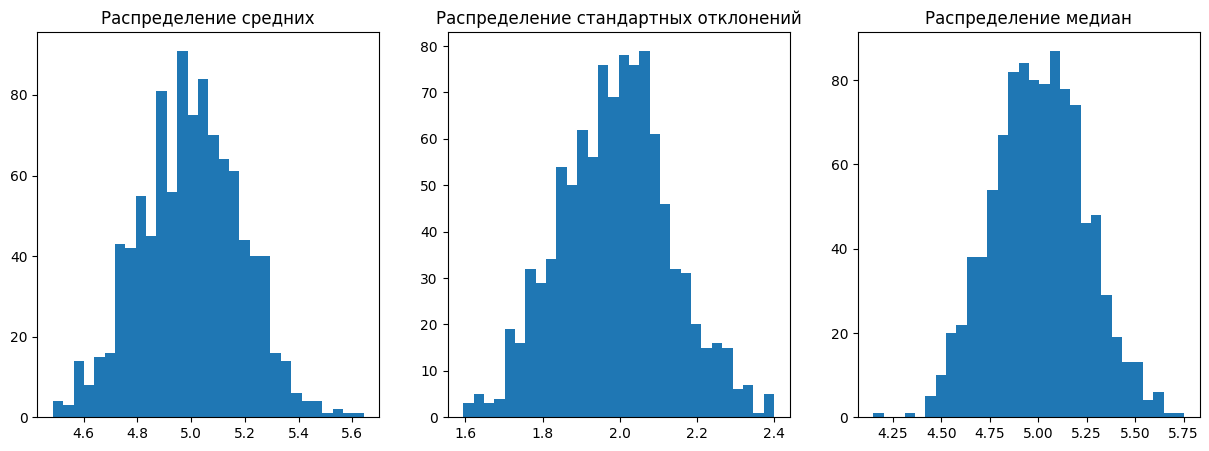

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
from tqdm import tqdm

def calc_stat_random_sample(mu=5, sigma=4, size=100):
    sample = np.random.normal(loc=mu, scale=np.sqrt(sigma), size=size)
    mean = np.mean(sample)
    std = np.std(sample, ddof=1)
    median = np.median(sample)

    return (mean, std, median)

n = 1000

means = np.zeros(n)
stds = np.zeros(n)
medians = np.zeros(n)

for i in tqdm(range(n)):
    mean_val, std_val, median_val = calc_stat_random_sample()
    means[i] = mean_val
    stds[i] = std_val
    medians[i] = median_val

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].hist(means, bins=30)
axes[0].set_title('Распределение средних')

axes[1].hist(stds, bins=30)
axes[1].set_title('Распределение стандартных отклонений')

axes[2].hist(medians, bins=30)
axes[2].set_title('Распределение медиан')

plt.show()


**(1 Балл)** Какому распределению принадлежит распределение средних? Почему?

Нормальному по ЦПТ

### Задача 2 (2 балла):

Оцените значение $\hat{\mu}$ параметра $\mu$ **(1 балл)** для нормального распределения $\mathscr{N}(\mu,1)$ используя метод максимального правдоподобия.

Справка: функция плотности распределения для нормального распределения имеет вид:
$$
    f(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \text{e}^{-\frac{(x - \mu)^2}{2 \sigma^2}}
$$

Функция правдоподобия
$$L(\mu) = \prod \frac{1}{\sqrt{2 \pi }} \text{e}^{-\frac{(x_i - \mu)^2}{2 }}$$

Её логарифм:
$$ l(\mu) = \sum \ln \frac{1}{\sqrt{2 \pi}} - \sum{\frac{(x_i - \mu)^2}{2 }}\ln\text{e} $$

Дифференцируем по $\mu$: $$\sum(x_i-\mu)$$

Ищем экстремум: $$\sum(x_i-\mu)=0$$ откуда $$\sum(x_i)= n\mu \quad \mu = \frac{1}{n}\sum(x_i)$$

Сгенерируйте 1000 выборок размером 1000 наблюдений из нормального распределения с $\mu = 5, \sigma^2 = 1$, постройте распределение разности $\mu - \hat{\mu}$ и найдите среднее этой разности в зависимости от числа выборок **(1 балл)**.

100%|██████████| 1000/1000 [00:00<00:00, 15265.56it/s]


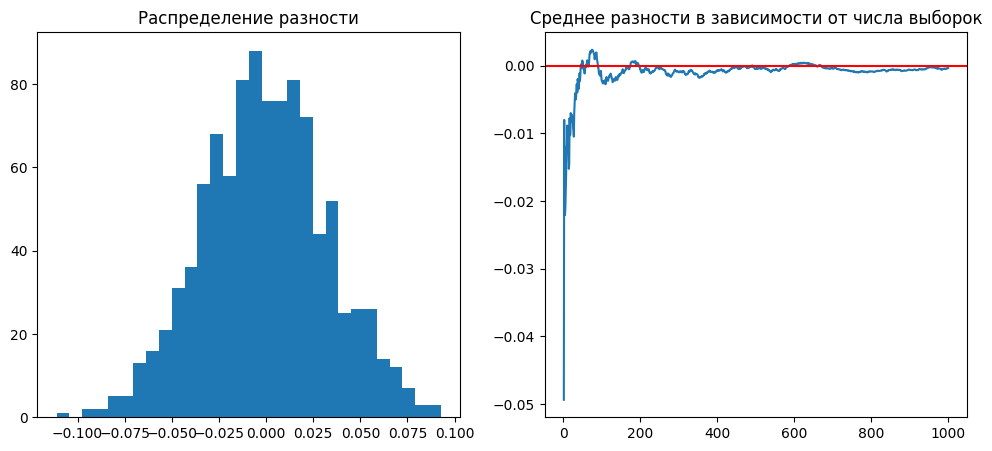

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

mu = 5
sigma = 1
n_samples = 1000
sample_size = 1000

mu_ml_values = np.zeros(n_samples)

for i in tqdm(range(n_samples)):
    sample = np.random.normal(loc=mu, scale=sigma, size=sample_size)
    mu_ml = np.mean(sample)
    mu_ml_values[i] = mu_ml

diff = mu - mu_ml_values

cum_mean_diff = np.cumsum(diff) / np.arange(1, n_samples + 1)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.hist(diff, bins=30)
ax1.set_title('Распределение разности')

ax2.plot(range(1, n_samples + 1), cum_mean_diff)
ax2.axhline(y=0, color='r', linestyle='-')
ax2.set_title('Среднее разности в зависимости от числа выборок')


plt.show()





### Задача 3 (2 балла)

**(1 балл)** Пусть известно, что выборка в n наблюдений порождена распределением Бернулли ~Bernoulli(p), пусть среднее значение по выборке равно $\hat{p}$. Постройте формулу 95% доверительного интервал для среднего

*Решение:* По ЦПТ среднее будет распределено нормально, дисперсия случайной величины будет $\hat{p} \cdot (1 - \hat{p})$ следовательно можем просто накатить формулку:
$$ \hat{p} \pm 1.96 \sqrt{\frac{\hat{p} \cdot (1 - \hat{p})}{n}}$$

**(1 балл)** Постройте 95% доверительный интервал на среднее в представленной выборке, используя бутстрап и сравните с теоретическим значением

In [76]:
import numpy as np
import scipy.stats as sps

n = 10000
p_true = 0.2
X = sps.bernoulli.rvs(p_true, size=n, random_state=42)

p_hat = np.mean(X)
se_theory = np.sqrt(p_hat * (1 - p_hat) / n)
ci_theory = (p_hat - 1.96 * se_theory, p_hat + 1.96 * se_theory)

n_resamples = 10000
bootstrap_samples = np.random.choice(X, size=(n_resamples, n), replace=True)
bootstrap_means = np.mean(bootstrap_samples, axis=1)

ci_bootstrap = np.percentile(bootstrap_means, [2.5, 97.5])

print(f"Выборочное среднее: {p_hat:.4f}")
print(f"Теоретический доверительный интервал: [{ci_theory[0]:.4f}, {ci_theory[1]:.4f}]")
print(f"Доверительный интервал на выборке с бутстрапом:     [{ci_bootstrap[0]:.4f}, {ci_bootstrap[1]:.4f}]")


Выборочное среднее: 0.1962
Теоретический доверительный интервал: [0.1884, 0.2040]
Доверительный интервал на выборке с бутстрапом:     [0.1883, 0.2039]


### Задача 4 (4 балла)

Основным критерием для тестирования гипотезы о равенстве средних является t-test. Он строится на том, что по ЦПТ практически для любой случайной величины средние будут распределены нормально.

В учебниках по статистике доказывается, что в силу этого для двух выборок, порождённых одинаково распределёнными независимыми случайными величинами с равным средним мы имеем асимпототику для выборочной t-статистики
$$
    T = \frac{\bar{x} - \bar{y}}{\sqrt{\frac{s_x^2}{n_1} + \frac{s_y^2}{n_2}}} \rightarrow t_{n_1 + n_2 - 2},
$$
где $\bar{x}, \bar{y}$ -- выборочные средние в выборках, $s_x^2, s_y^2$ -- выборочные дисперсии, $n_1, n_2$ -- размеры выборок, а $t_{n_1 + n_2 - 2}$ -- распределение Стьюдента с $n_1 + n_2 - 2$ степенями свободы.

**(1 балл)** Постройте плотность распределения Стьюдента с 1, 5, 10, 100 и 1000 степеней свободы, а также плотность стандартного нормального распределения

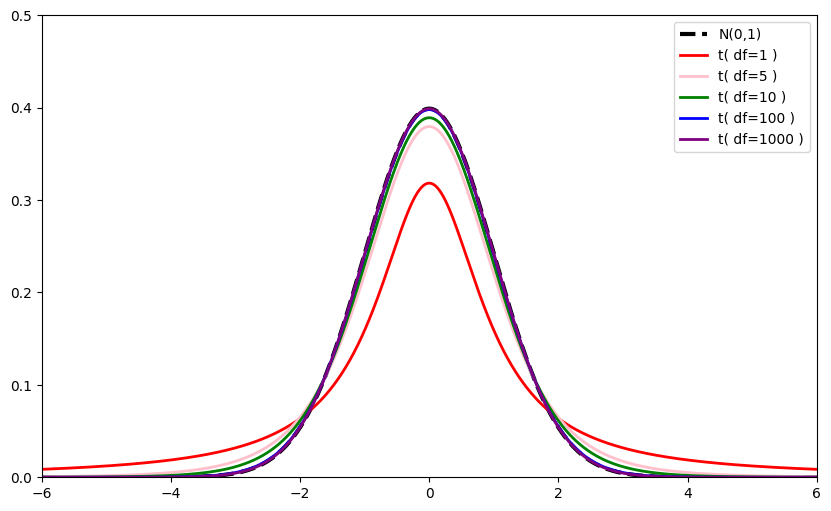

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps

grid = np.arange(-10,10,0.01)
freedom_degrees = [1,5,10,100,1000]

plt.figure(figsize=(10, 6))

plt.plot(grid, sps.norm.pdf(grid), color='black', linewidth=3, linestyle='--', label='N(0,1)')

colors = ['red', 'pink', 'green', 'blue', 'purple']
for df, color in zip(freedom_degrees, colors):
    plt.plot(grid, sps.t.pdf(grid, df=df),
             color=color, linewidth=2,
             label=f't( df={df} )')

plt.legend()
plt.xlim(-6,6)
plt.ylim(0, 0.5)
plt.show()

**(1 балл)** Пусть нам необходимо запустить A/B тест: в первой группе мы оставляем кнопку в банковском приложении в сером цвете, во втором -- красим её в жёлтый. Всего у нас в месяц в приложение заходит 1000 различных клиентов. Базовая конверсия в нажатие кнопки сейчас составляет 0.2. Бизнес постановил, что MDE = 5%, то есть значимым будет считаться изменение, при котором конверсия будет больше 0.21 или меньше 0.19. Хватит ли нам данных, чтобы замерить эффект за один месяц при уровне значимости $\alpha = 0.05$, если мы планируем поделить выборку пополам на тест и контроль?

In [78]:
from statsmodels.stats.power import TTestIndPower

alpha = 0.05
n = 500
p1 = 0.2
p2 = 0.21

effect_size = (p2 - p1) / np.sqrt(p1 * (1 - p1))

analysis = TTestIndPower()
power = analysis.power(effect_size=effect_size, nobs1=n, ratio=1.0, alpha=alpha)

print(f"Мощность теста: {power}")
print(f"Данных {'хватит' if power >= 0.8 else 'не хватит'}")


Мощность теста: 0.06804910892849299
Данных не хватит


**(1 балл)** Мы провели тест и получили следующие результаты:

In [79]:
X_1, X_2 = sps.bernoulli.rvs(0.2, size = 1000, random_state=42), sps.bernoulli.rvs(0.21, size = 1000, random_state=42)

Можем ли мы утверждать на уровне значимости $\alpha = 0.05$, что эффект имел место быть?

In [80]:
t_stat, p_value = sps.ttest_ind(X_1, X_2)

print(f"p-value: {p_value:.4f}")
if p_value < 0.05:
    print("Эффект статистически значим")
else:
    print("Эффект не обнаружен")

p-value: 0.5065
Эффект не обнаружен


**(1 балл)**

Что будет, если мы проведём 1000 таких тестов, "отпустив" random_state?

В какой доле случаев мы не задетектируем это существующее различие? Чему будет равна $\beta$?

In [87]:
# Под "отпущенным" random_state понимается None
# X_1, X_2 = sps.bernoulli.rvs(0.2, size = 1000), sps.bernoulli.rvs(0.21, size = 1000)

# Место для кода
p_values = []
for _ in range(1000):
    X_1, X_2 = sps.bernoulli.rvs(0.2, size = 1000), sps.bernoulli.rvs(0.21, size = 1000)
    p_values.append(sps.ttest_ind(X_1, X_2).pvalue)

p_values = np.array(p_values)
hits = np.mean(p_values < 0.05)
beta = 1 - hits

print(f"В beta = {beta:.2%} не задектируем различие -> ошибка второго рода")


В beta = 91.70% не задектируем различие -> ошибка второго рода


А если различий не будет (при проведении 1000 A/A-тестов)? Как будет распределено p-value в этом случае?

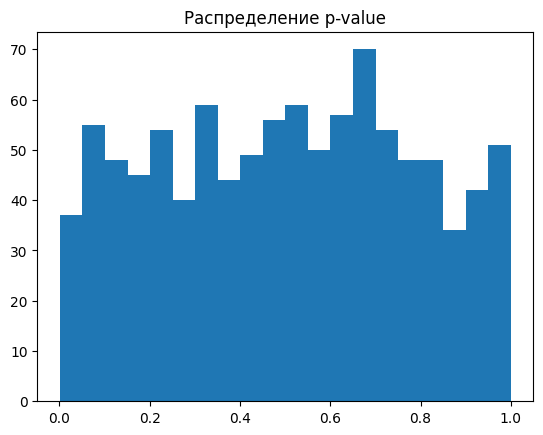

In [86]:
# Под A/A тестом имеем в виду: X_1, X_2 = sps.bernoulli.rvs(0.2, size = 1000), sps.bernoulli.rvs(0.2, size = 1000)

p_values_aa = []
for _ in range(1000):
    X_1, X_2 = sps.bernoulli.rvs(0.2, size = 1000), sps.bernoulli.rvs(0.2, size = 1000)
    p_values_aa.append(sps.ttest_ind(X_1, X_2).pvalue)

plt.hist(p_values_aa, bins=20)
plt.title("Распределение p-value")
plt.show()
